# Fourbar analysis

* Recall the fourbar setup with the different link lengths, $a,b,c,d$ and orientations $\theta_1,\theta_2,\theta_3$ and $\theta_4$ (In the figure below, $\theta_1=0$ is not shown)

<div>
<img src="fourbar.png" width="500"/>
</div>

* The problem we seek to solve here is ``Given an orientation of the crank, what is the position and orientation of each other link in the mechanism?''

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Assign link lengths per the figure above so that 'a' is crank length, 'b' is coupler length and so on; 't1' is $\theta_1$, the orientation of the ground, and 't2' is $\theta_2$, the orientation of the crank, both in radians.

In [28]:
a=1
b=2
c=3
d=3
t1=0
t2=45*np.pi/180

# 
phi=20*np.pi/180 #np.arctan(Poff/(b/2+Ppos)) # angle BAP
ap=1 # np.sqrt((b/2+Ppos)**2+Poff**2)

Define constants $K_1,K_2,K_3,K_4$

In [29]:
K1=2*d*c*np.cos(t1)-2*a*c*np.cos(t2)
K2=2*d*c*np.sin(t1)-2*a*c*np.sin(t2)
K3=2*a*d*np.sin(t1)*np.sin(t2) + 2*a*d*np.cos(t1)*np.cos(t2)
K4=b**2-a**2-c**2-d**2

Intermediate constants $A,B,C$

In [30]:
A=K4+K1+K3
B=-2*K2
C=K4-K1+K3


if A.all()==0:
    A=np.finfo.eps

t42=2*np.arctan2((-B-np.sqrt(B**2-4*A*C)),(2*A))
t41=2*np.arctan2((-B+np.sqrt(B**2-4*A*C)),(2*A))

K5=2*a*b*np.cos(t2)-2*b*d*np.cos(t1)
K6=2*a*b*np.sin(t2)-2*b*d*np.sin(t1)
K7=2*a*d*np.sin(t1)*np.sin(t2) + 2*a*d*np.cos(t1)*np.cos(t2)
K8=(c**2-d**2-a**2-b**2)


D=K8+K7+K5
E=-2*K6
F=K8-K5+K7

if D.all()==0:
    D=np.finfo.eps

Solve for $\theta_3$ and $\theta_4$. Recall that each angle has two solutions, each corresponding to a configuration.

In [40]:
t32=2*np.arctan2((-E+np.sqrt(E**2-4*D*F)),(2*D));
t31=2*np.arctan2((-E-np.sqrt(E**2-4*D*F)),(2*D));
t42=2*np.arctan2((-B+np.sqrt(B**2-4*A*C)),(2*A));
t41=2*np.arctan2((-B-np.sqrt(B**2-4*A*C)),(2*A));
print("theta_3=%.2f,%.2f degrees" %(t31*180/np.pi,t32*180/np.pi))
print("theta_4=%.2f,%.2f degrees" %(t41*180/np.pi,t42*180/np.pi))

theta_3=-291.67,257.39 degrees
theta_4=-155.49,121.21 degrees


In [32]:
# Pick a configuration

config=1
if config==1:
    t3=t31
else:
    t3=t32

Plot the fourbar in this configuration (compare with the figure on the top of the page)

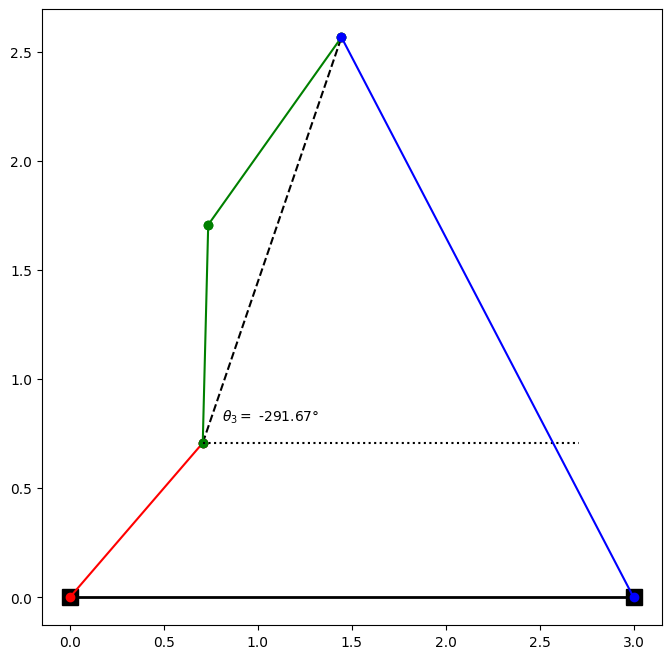

In [41]:
import matplotlib.pyplot as plt

Rz=np.array([0,0])
if np.isscalar(t1):
    t1=t1 + t2*0


Ra=np.array([a*np.cos(t2), a*np.sin(t2)])
Rb=np.array([b*np.cos(t3), b*np.sin(t3)]) + Ra
Rp=np.array([ap*np.cos(t3+phi), ap*np.sin(t3+phi)]) + Ra
Ry=np.array([c*np.cos(t1), d*np.sin(t1)])


# plot everything
fig, ax = plt.subplots(figsize=(8,8))

# d
plt.plot([Rz[0], Ry[0]], [Rz[1], Ry[1]],'k-s', linewidth=2, markersize=12)
# a
plt.plot([Rz[0], Ra[0]], [Rz[1], Ra[1]],'r-o')
# b
plt.plot([Ra[0], Rb[0]], [Ra[1], Rb[1]],'k--o')
plt.plot([Ra[0], Rp[0]], [Ra[1], Rp[1]],'g-o')
plt.plot([Rp[0], Rb[0]], [Rp[1], Rb[1]],'g-o')
plt.plot([Ra[0], Ra[0]+b], [Ra[1], Ra[1]],'k:')
angle = "%0.2f"%float(t3*180/np.pi)+u"\u00b0"
plt.text(Ra[0]+b/20, Ra[1]+b/20, r'$\theta_3=$ '+angle)
# c
plt.plot([Rb[0], Ry[0]], [Rb[1], Ry[1]],'b-o')
plt.show()